<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_figure4B_for_WenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
###Figure 4B
data_4B_file_path = '/content/drive/My Drive/WenLab/Figure 4-source data for Figure 4B.xlsx'
df_4B_sum = pd.read_excel(data_4B_file_path, sheet_name='Summary',header=2)
df_4B = pd.read_excel(data_4B_file_path)
print(df_4B.keys())
# df_4B_sum.head()
df_4B_1 = pd.read_excel(data_4B_file_path, sheet_name='WEN0852_Pnpr-9  Chrimson',header=2)
df_4B_2 = pd.read_excel(data_4B_file_path, sheet_name='triple mutants')
df_4B_3 = pd.read_excel(data_4B_file_path, sheet_name='triple mutants+Psto-3  avr-15')
df_4B_4 = pd.read_excel(data_4B_file_path, sheet_name='triple mutants+Pttx-3  glc-1')
df_4B_5 = pd.read_excel(data_4B_file_path, sheet_name='triple mutants+Pttx-3  avr-14')
df_4B_sum.head(10)
df_4B_2.head()

Index(['For Figure 4B', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


,worm name,no response,reversal,turn,reversal+turn,reversal length_s(by code)
0,20161222w1,NaN,NaN,NaN,1,1.286904
1,NaN,NaN,NaN,NaN,1,1.090083
2,NaN,NaN,NaN,2.0,1,0.802422
3,NaN,NaN,NaN,NaN,1,3.088569
4,NaN,NaN,NaN,2.0,1,1.120363


0    5.590134
1    2.530895
2     3.52653
3    4.368407
4     4.25166
Name: reversal length(frames), dtype: object


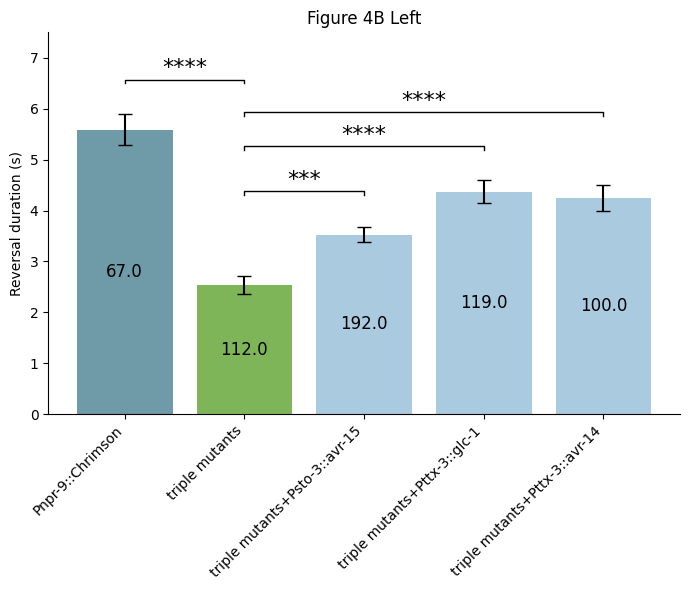

<Figure size 640x480 with 0 Axes>

In [6]:
###left
import matplotlib as mpl


data_B_1 = df_4B_sum[df_4B_sum['worm'].str.contains("WEN0852", na=False)].iloc[0]
data_B_2 = df_4B_sum[df_4B_sum['worm'].str.contains('triple mutants', na=False)].iloc[0]
data_B_3 = df_4B_sum[df_4B_sum['worm'].str.contains('Psto-3::avr-15', na = False, regex = False)].iloc[0]
data_B_4 = df_4B_sum[df_4B_sum['worm'].str.contains('Pttx-3::glc-1', na = False, regex = False)].iloc[0]
data_B_5 = df_4B_sum[df_4B_sum['worm'].str.contains('pttx-3::avr-14_a', na=False,regex = False)].iloc[0]
# 为了绘图，我们创建更简洁易读的标签
labelsB = [
    'Pnpr-9::Chrimson',
    'triple mutants',
    'triple mutants+Psto-3::avr-15',
    'triple mutants+Pttx-3::glc-1',
    'triple mutants+Pttx-3::avr-14'
]

# 从 DataFrame 中提取绘图所需数据
data_to_plot = pd.concat([data_B_1, data_B_2, data_B_3, data_B_4, data_B_5], axis=1).T
meansB = data_to_plot['reversal length(frames)']
semsB = data_to_plot['sem']
sample_sizesB = data_to_plot['n']
x_posB = np.arange(len(labelsB))
print(meansB)
#2. 绘图
fig, ax = plt.subplots(figsize=(7, 6))

# 创建条形图
# 使用与原图相似的颜色 (对照组和拯救组为深/浅蓝色，突变体为绿色)
colors = ['#5F8F9F', '#70AD47', '#A1C5DC', '#A1C5DC', '#A1C5DC']
bars = ax.bar(x_posB, meansB,
              yerr=semsB,          # 添加误差线 (SEM)
              align='center',
              alpha=0.9,
              color=colors,
              ecolor='black',       # 误差线颜色
              capsize=5)          # 误差线顶端横线宽度

# 在每个条形图内部添加样本量 (n) 的数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, # x 轴居中
            height / 2,                      # y 轴居中
            f'{sample_sizesB[i]}',             # 文本内容为 n 值
            ha='center',
            va='center',
            color='black',
            fontsize=12,
            fontweight=None)

def add_significance_bracket(x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.07 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.03  # 星号文本的高度
    # 绘制水平线
    plt.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    plt.text((x1 + x2) * 0.5, text_y, text, ha='center', va='bottom', fontsize=16)
##绘制四组数据之间的的显著性分析线
  # a) 比较 'Pnpr-9::Chrimson', 'triple mutants'
p_val_1_multiB = data_B_2.get('p-value u-test multi', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_1_multiB) and p_val_1_multiB < 0.0001:
    #
    Rd_max = max(meansB[0],meansB[1])
    y_max = Rd_max+max(semsB[0],semsB[1])
    add_significance_bracket(x_posB[0], x_posB[1], y_max + 0.6, '****')
  # b) 比较 DATA4B2 vs data4B3
p_val_2_multiB = data_B_3.get('p-value u-test multi', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_2_multiB) and p_val_2_multiB < 0.001:
    #
    Rd_max = max(meansB[1],meansB[2])
    y_max = Rd_max+max(semsB[1],semsB[2])
    add_significance_bracket(x_posB[1], x_posB[2], y_max + 0.6, '***')
else:
  add_significance_bracket(x_posB[1], x_posB[2], y_max + 0.6, 'ns')
## c) 比较 data4B2(x=2) vs data4B4(x=3)
p_val_3_multiB = data_B_4.get('p-value u-test multi', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_3_multiB) and p_val_3_multiB < 0.0001:
    Rd_max = max(meansB[1],meansB[3])
    y_max = max(Rd_max+semsB[1], Rd_max+semsB[3])
    add_significance_bracket(x_posB[1], x_posB[3], y_max + 0.6, '****')
## d) 比较 data4B2(x=3) vs data4B5(x=4)
p_val_4_multiB = data_B_5.get('p-value u-test multi', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_4_multiB) and p_val_4_multiB < 0.0001:
    # 需要比较x=1和x=2之间那一组的meansB和sem最高
    Rd_max = max(meansB[1], meansB[4])
    y_max = max(Rd_max+semsB[1], Rd_max+semsB[4])
    add_significance_bracket(x_posB[1], x_posB[4], y_max + 1.35, '****')



#3. 格式化图表
ax.set_ylabel('Reversal duration (s)')
ax.set_title('Figure 4B Left')
ax.set_xticks(x_posB)
ax.set_xticklabels(labelsB, rotation=45, ha='right') # 标签水平显示
ax.set_ylim(0, 7.5) # 设置 Y 轴范围以匹配原图

# 移除顶部和右侧的坐标轴线，使图像更简洁
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 确保布局紧凑
plt.tight_layout()

# 显示图像
plt.show()


plt.savefig('figure_4b_left_reproduction.png', dpi=300)

In [7]:
print("df_4B_1 (Control) 的列名:", list(df_4B_1.columns))
print("修改前df_4B_2 (Mutants) 的列名:", list(df_4B_2.columns))
#修改一些mutant组的列名，不然系统貌似识别不出来
df_4B_2.rename(columns={
        'reversal length_s(by code)': 'duration time (s)',
        'reversal+turn': 'reversalturn'
    }, inplace=True)
print("修改后df_4B_2 (Mutants) 的列名:", list(df_4B_2.columns))

df_4B_1 (Control) 的列名: ['worm name ', 'turn', 'duration time (s)', 'date', 'note']
修改前df_4B_2 (Mutants) 的列名: ['worm name', 'no response', 'reversal', 'turn', 'reversal+turn', 'reversal length_s(by code)']
修改后df_4B_2 (Mutants) 的列名: ['worm name', 'no response', 'reversal', 'turn', 'reversalturn', 'duration time (s)']


处理: Control_B...
处理: Triple_Mutants_B...
Figure 4B 实验数据点计算完毕。

--- 开始绘制 Figure 4B 图表
成功拟合: Control_B (参数: [0.03482282 0.13901237 3.34370528 0.78469375])
成功拟合: Triple_Mutants_B (参数: [1.97927651e-04 2.61613142e-04 1.26950057e-03 1.70881012e+00])


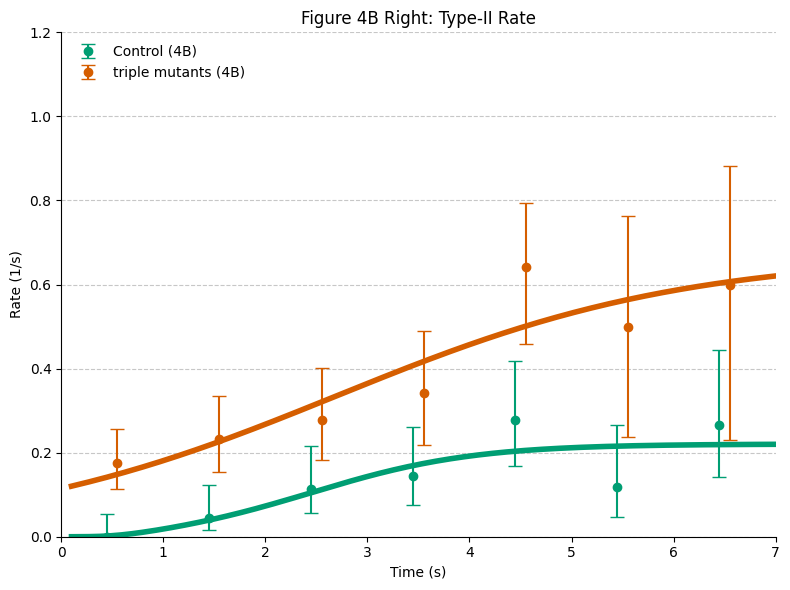

Figure 4B 绘图完成！


In [8]:
# 确保所有工具都已导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.special import erfi

time_col_4B_ctrl = 'duration time (s)'
behavior_col_4B_ctrl = 'turn'

# 4B-Mutant (df_4B_2) 的列名
time_col_4B_mutant = 'duration time (s)'
behavior_col_4B_mutant = 'reversalturn'

# 定义 4A 和 4B 通用的拟合函数
def r2_fit_function_v2(t, k1, k2, k3, k4):
    """
    r2(t) = k1 / erfi( k2 + k3 * exp(-t / k4) )
    """
    argument = k2 + k3 * np.exp(-t / k4)
    denominator = erfi(argument) + 1e-9 # 防止除零
    return k1 / denominator

# 定义 4A 和 4B 通用的显著性星号函数
def p_to_asterisk(p_value):
    """根据图注中的标准，将 p 值转换为显著性星号。"""
    if p_value < 0.0001: return '****'
    if p_value < 0.001: return '***'
    if p_value < 0.01: return '**'
    if p_value < 0.05: return '*'
    return 'ns' # 'ns' = 不显著

# 步骤 1: 为 Figure 4B 定义新的数据和常量


# 将你的变量打包到新的字典中
DATA_FILES_B = {
    'Control_B': df_4B_1,
    'Triple_Mutants_B': df_4B_2
}

# 为 4B 定义新的列名字典
TIME_COLS_B = {
    'Control_B': time_col_4B_ctrl,
    'Triple_Mutants_B': time_col_4B_mutant
}
BEHAVIOR_COLS_B = {
    'Control_B': behavior_col_4B_ctrl,
    'Triple_Mutants_B': behavior_col_4B_mutant
}

# 定义 4B 的新常量
TIME_BINS_B = np.arange(0, 8, 1) # 假设时间轴相同
STATE_WE_CARE_ABOUT_B = 1
experimental_data_B = {} # 存储 4B 的计算结果

# 步骤 2: 处理 Figure 4B 的数据


for group_name, df in DATA_FILES_B.items():
    print(f"处理: {group_name}...")

    # 关键：为 4B 的每一组获取其 *专属* 的列名
    try:
        time_col_B = TIME_COLS_B[group_name]
        behavior_col_B = BEHAVIOR_COLS_B[group_name]
    except KeyError:
        print(f"*** 错误: {group_name} 的列名未在 TIME_COLS_B 或 BEHAVIOR_COLS_B 中定义。")
        continue

    # 复制 DataFrame 以免修改原始变量
    df_clean_B = df.copy()

    # 清理和类型转换
    try:
        df_clean_B[time_col_B] = pd.to_numeric(df_clean_B[time_col_B], errors='coerce')
        df_clean_B[behavior_col_B] = pd.to_numeric(df_clean_B[behavior_col_B], errors='coerce')
        df_clean_B = df_clean_B.dropna(subset=[time_col_B, behavior_col_B])
    except KeyError as e:
        print(f"*** 严重错误: 找不到列 {e}。")
        print(f"请立即检查你的 '(!!) 关键配置 (!!)' 部分的列名是否正确。")
        # 跳过这一组
        continue

    # 准备空列表
    x_coords_B, rates_B, ci_low_B, ci_high_B = [], [], [], []
    S_total_list_B, n_events_list_B = [], [] # 必须为 S_total 和 n_events 创建列表

    # 计算转变率
    for i in range(len(TIME_BINS_B) - 1):
        bin_start, bin_end = TIME_BINS_B[i], TIME_BINS_B[i+1]
        survivors = df_clean_B[df_clean_B[time_col_B] >= bin_start]
        S_total = len(survivors)
        events_in_bin = survivors[(survivors[time_col_B] < bin_end) & (survivors[behavior_col_B] == STATE_WE_CARE_ABOUT_B)]
        n_events = len(events_in_bin)

        x_coords_B.append((bin_start + bin_end) / 2)
        S_total_list_B.append(S_total)
        n_events_list_B.append(n_events) # <--- BUG 修复

        if S_total > 0:
            rate, (low, high) = n_events / S_total, proportion_confint(n_events, S_total, method='wilson')
            rates_B.append(rate); ci_low_B.append(low); ci_high_B.append(high)
        else:
            rates_B.append(np.nan); ci_low_B.append(np.nan); ci_high_B.append(np.nan)

    # 将结果存入字典
    experimental_data_B[group_name] = {
        'x': np.array(x_coords_B),
        'y': np.array(rates_B),
        'ci_low': np.array(ci_low_B),
        'ci_high': np.array(ci_high_B),
        'S_total': np.array(S_total_list_B),
        'n_events': np.array(n_events_list_B)
    }

print("Figure 4B 实验数据点计算完毕。")

# 步骤 3: 绘制 Figure 4B 的图表、拟合和显著性

print("\n--- 开始绘制 Figure 4B 图表")

fig_B, ax_B = plt.subplots(figsize=(8, 6))

# 为 4B 定义图例标签和颜色
LABELS_B = {
    'Control_B': 'Control (4B)',
    'Triple_Mutants_B': 'triple mutants (4B)'
}
COLORS_B = {
    'Control_B': '#009E73', # 绿色 (Control)
    'Triple_Mutants_B': '#D55E00'  # 红色 (Mutant)
}
OFFSETS_B = {
    'Control_B': -0.05,
    'Triple_Mutants_B': 0.05
}

# 为拟合曲线创建平滑的时间轴
t_smooth_B = np.linspace(0.1, 7, 200)

# 拟合参数的初始猜测值
initial_guesses_B = [0.0007, 0.0020, 0.1264, 0.8393]

for group_name, data in experimental_data_B.items():

    offset = OFFSETS_B.get(group_name, 0.0)

    # A: 绘制实验数据点和误差线
    y_error_B = [data['y'] - data['ci_low'], data['ci_high'] - data['y']]
    ax_B.errorbar(data['x'] + offset, data['y'], yerr=y_error_B,
                  fmt='o', capsize=5,
                  color=COLORS_B[group_name],
                  label=LABELS_B[group_name])

    # B: 准备拟合数据
    valid_indices = ~np.isnan(data['y'])
    x_fit_B = data['x'][valid_indices]
    y_fit_B = data['y'][valid_indices]

    # C: 进行拟合
    try:
        params_B, _ = curve_fit(r2_fit_function_v2, x_fit_B, y_fit_B, p0=initial_guesses_B, maxfev=5000)
        y_smooth_B = r2_fit_function_v2(t_smooth_B, *params_B)
        ax_B.plot(t_smooth_B, y_smooth_B, color=COLORS_B[group_name], lw=4)
        print(f"成功拟合: {group_name} (参数: {params_B})")
    except RuntimeError:
        print(f"*** 警告: 无法为 {group_name} 找到合适的拟合参数。")
    except Exception as e:
        print(f"*** 拟合 {group_name} 时出错: {e}")

# 步骤 4: 计算并绘制 Figure 4B 的显著性星号（用python和matlab的计算显著性的方法貌似不同，可能造成误差，故选择）

# print("正在计算 Figure 4B 统计 (Mutants vs Control)...")
# try:
#     # 提取两组的完整结果，以便比较
#     ctrl_data_B = experimental_data_B['Control_B']
#     mutant_data_B = experimental_data_B['Triple_Mutants_B']

#     for i in range(len(ctrl_data_B['x'])):
#         # 提取原始计数
#         n_events_ctrl = ctrl_data_B['n_events'][i]
#         s_total_ctrl = ctrl_data_B['S_total'][i]
#         n_not_turned_ctrl = s_total_ctrl - n_events_ctrl

#         n_events_exp = mutant_data_B['n_events'][i]
#         s_total_exp = mutant_data_B['S_total'][i]
#         n_not_turned_exp = s_total_exp - n_events_exp

#         if s_total_ctrl > 0 and s_total_exp > 0:
#             table = [ [n_events_exp,  n_not_turned_exp],
#                       [n_events_ctrl, n_not_turned_ctrl] ]

#             p_value = fisher_exact(table)[1]
#             asterisk = p_to_asterisk(p_value)

#             if asterisk != 'ns':
#                 # Y 轴位置：取两组中较高的那个误差棒，再往上加一点
#                 y_pos = max(ctrl_data_B['ci_high'][i], mutant_data_B['ci_high'][i]) + 0.05
#                 # X 轴位置：画在两个偏移点正中间
#                 x_pos = ctrl_data_B['x'][i] # (0.5, 1.5, ...)

#                 ax_B.text(x_pos, y_pos, asterisk, ha='center', va='bottom',
#                         color=COLORS_B['Triple_Mutants_B'], fontweight='bold', fontsize=12)
# except KeyError:
#      print("*** 错误: 未能提取 'Control_B' 或 'Triple_Mutants_B' 的数据用于统计。")
#      print("这可能是由于数据加载或处理失败。")


# 步骤 5: 美化 Figure 4B 图表
ax_B.set_title('Figure 4B Right: Type-II Rate')
ax_B.set_xlabel('Time (s)')
ax_B.set_ylabel('Rate (1/s)')
ax_B.set_xlim(0, 7)
ax_B.set_ylim(0, 1.2) # 留出空间给星号
ax_B.set_xticks(np.arange(0, 8, 1))
ax_B.legend(loc='upper left', frameon=False)
ax_B.spines['top'].set_visible(False)
ax_B.spines['right'].set_visible(False)
ax_B.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("Figure 4B 绘图完成！")